In [3]:
# following tutorial https://realpython.com/nltk-nlp-python/

# OPEN FOLDER INSTEAD OF OPENING THE NOTEBOOK DIRECTLY

In [2]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /Users/felipe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
with open('data/book1.txt', 'r') as file:
    data = file.read().replace("\n", " ")

In [53]:
# for word tokenization, filter out english stop_words (which don't usually add meaning)

s_data = sent_tokenize(data)
w_data = [word for word in word_tokenize(data) if word.casefold() not in stop_words]

def erase_stopwords(text, stop_words):
    # text already assumed to have been tokenized
    return [word for word in text if word.casefold() not in stop_words]

In [7]:
# stemming: finding word roots
# alternative to PorterStemmer is the Snowball Stemmer, called Porter2 in NLTK

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_w_data = [stemmer.stem(word) for word in w_data]

In [8]:
# classify part of speach

nltk.download('averaged_perceptron_tagger')
w_data_pos = nltk.pos_tag(w_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/felipe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# lemmatizing:  like stemming but instead of producing a non-english
#               stem (e.g. discoveri is stem for discoveries), it simply
#               produces one representative word for the whole group with
#               the same root. (i.e. map it to discovery).

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemm_w_data = [lemmatizer.lemmatize(word) for word in w_data]

[nltk_data] Downloading package wordnet to /Users/felipe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# chunking: chunk sentences up into grammatical units (like
# 'a swiftly-moving athlete' functions as a single noun phrase)

grammar = "NP: {<DT>?<JJ>*<NN>}" 
# NP = noun phrase, which will have the following structure:
# optional (?) determiner ('DT')
# Can have any number (*) of adjectives (JJ)
# End with a noun (<NN>)

chunk_parser = nltk.RegexpParser(grammar)

# syntax for 'chinking' i.e. excluding things from chunks, 
# and chunking at the same time:
# 
# grammar = """
# Chunk: {<.*>+}
#         }<JJ>{"""
# 
# here {<.*>+} means 'everything's a chunk' and 
# }<JJ>{ means 'except adjectives'

In [11]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."
lotr_pos_tags = nltk.pos_tag(word_tokenize(lotr_quote))
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()


In [12]:
# Named entity recognition: recognize names of people, companies, etc

nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/felipe/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/felipe/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# nltk has its own databases of text too!

nltk.download("book")
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/felipe/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/felipe/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/felipe/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/felipe/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/felipe/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/felipe/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package depend

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [18]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [19]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

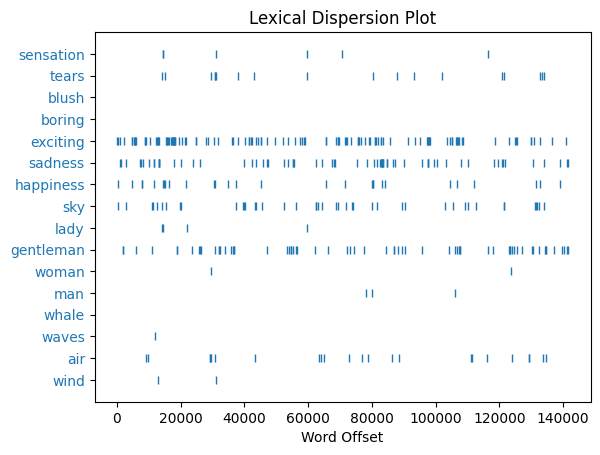

In [28]:
# dispersion plots!
v1 = ['wind', 'air', 'waves', 'whale', 'man', 'woman', 'gentleman', 'lady', 'sky']
v2 = ['happiness', 'sadness', 'exciting', 'boring', 'blush', 'tears', 'sensation']
v = [*v1, *v2]

text2.dispersion_plot(v)


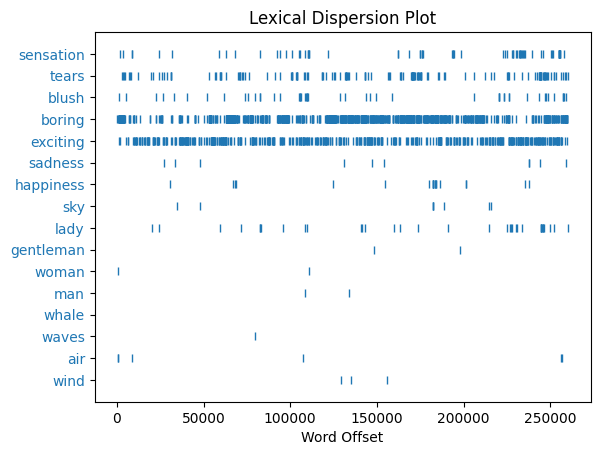

In [29]:
text1.dispersion_plot(v)

In [59]:
# frequency distribution
from nltk import FreqDist


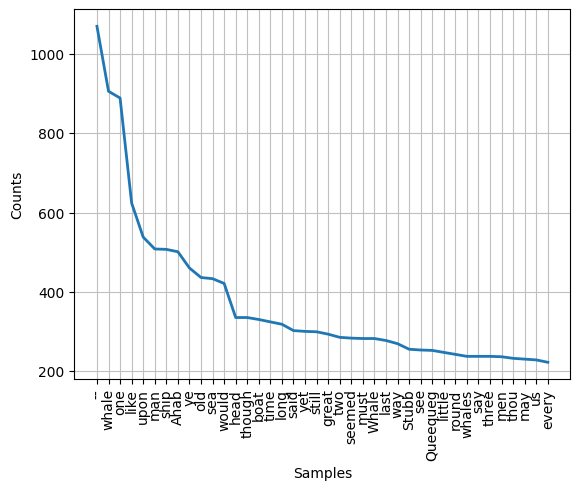

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [105]:
preprocessed_text = erase_stopwords(text1, stop_words)
freqdist = FreqDist(preprocessed_text)
import string
freqdist_nopunct = FreqDist({
    key: value for (key,value) in freqdist.items() 
    if key not in 
    [*string.punctuation, ',"', '."', '?"', '!"']
})
freqdist_nopunct.plot(40)

In [97]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


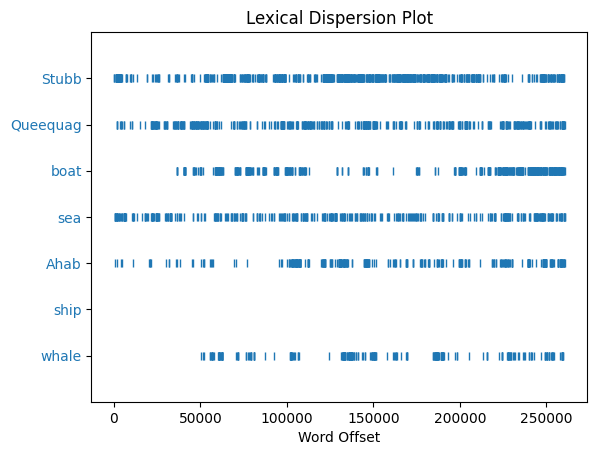

In [109]:
v1 = ['whale', 'ship', 'Ahab', 'sea', 'boat', 'Queequag', 'Stubb']
text1.dispersion_plot(v1)

In [116]:
# bringing lematized or otherwise processed objects to Text objects:

lemmatized_words = [lemmatizer.lemmatize(word) for word in text6]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis
